# 9. We will now consider the Boston housing data set, from the ISLR2 library.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df_boston = pd.read_csv("/Volumes/work/sem_1/MTH522/data/Boston.csv")
df_boston.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


## (a) Based on this data set, provide an estimate for the population mean of medv. Call this estimate μˆ.

In [3]:
mu = df_boston['medv'].mean(axis=0)
print("Population Mean:", mu)

Population Mean: 22.532806324110677


## (b) Provide an estimate of the standard error of μˆ. Interpret this result.

Standard error of the mean = s / √n

where:

s: sample standard deviation
n: sample size

*Source:* https://www.statology.org/standard-error-of-mean-python/

In [4]:
def std_err(data):
    return np.std(data, ddof=1) / np.sqrt(np.size(data))


print("Population Standard Error", std_err(df_boston['medv']))

Population Standard Error 0.40886114749753505


## (c) Now estimate the standard error of ˆµ using the bootstrap. How does this compare to your answer from (b)?

##### Here below I have created 1000 samples of length 300.

In [5]:
sample_means = list()  # Empty list

for _ in range(1000):
    y = np.random.choice(df_boston['medv'], size=300, replace=True)
    avg = np.mean(y)
    sample_means.append(avg)

In [6]:
print("Sample mean of mean:", np.mean(sample_means))
print("Standard deviation of sample means:", np.std(sample_means))

Sample mean of mean: 22.521797666666664
Standard deviation of sample means: 0.5413935552043243


Text(0.5, 0, 'Mean')

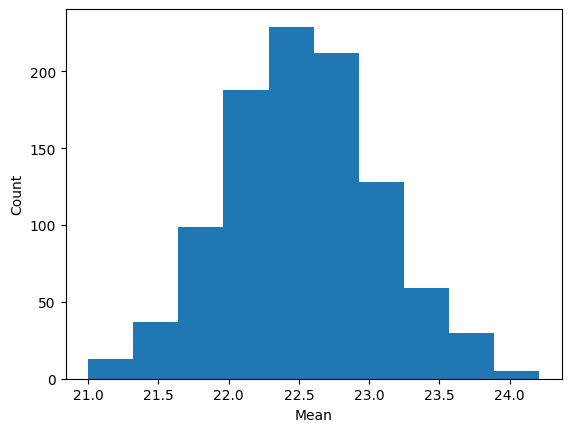

In [7]:
plt.hist(sample_means)
plt.ylabel("Count")
plt.xlabel("Mean")

## (d) Based on your bootstrap estimate from (c), provide a 95% confidence interval for the mean of medv. Compare it to the results obtained using t.test(Boston$medv).

In [8]:
std_err_boot = np.std(sample_means)
print(mu - 2 * std_err_boot, mu + 2 * std_err_boot)

21.450019213702028 23.615593434519326


## (e) Based on this data set, provide an estimate, ˆµmed, for the median value of medv in the population.

In [9]:
print("Population Median:", df_boston['medv'].median(axis=0))

Population Median: 21.2


## (f) We now would like to estimate the standard error of ˆµmed. Unfortunately, there is no simple formula for computing the standard error of the median. Instead, estimate the standard error of the median using the bootstrap. Comment on your findings.

In [10]:
sample_median = list()  # Empty list

for _ in range(1000):
    y = np.random.choice(df_boston['medv'], size=300, replace=True)
    sample_median.append(np.median(y))

In [27]:
print("Sample median of median:", np.median(sample_median))
print("Standard error of sample medians:", np.std(sample_median))

Sample median of median: 21.2
Standard error of sample medians: 0.46898954945712784


Text(0.5, 0, 'Median')

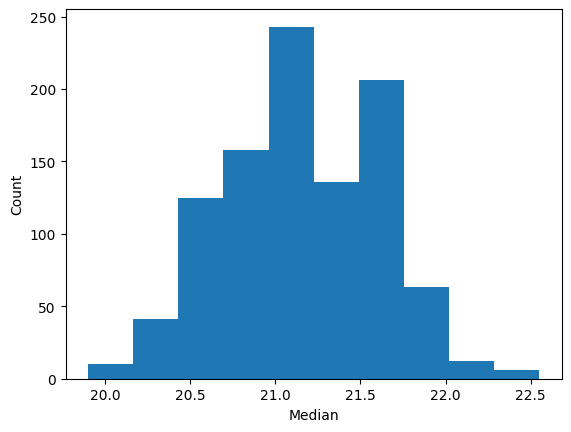

In [12]:
plt.hist(sample_median)
plt.ylabel("Count")
plt.xlabel("Median")

## (g) Based on this data set, provide an estimate for the tenth percentile of medv in Boston census tracts. Call this quantity ˆµ0.1. (You can use the quantile() function.)

In [13]:
mu_10 = df_boston.medv.quantile(0.1)
print("Tenth percentile of medv is:", mu_10)

Tenth percentile of medv is: 12.75


 ## (h) Use the bootstrap to estimate the standard error of ˆµ0.1. Comment on your findings.

In [24]:
sample_quantile_10 = list()

for _ in range(1000):
    y = np.random.choice(df_boston['medv'], size=505, replace=True)
    sample_quantile_10.append(np.quantile(y, 0.1))


In [26]:
print("Standard error of sample quantile of 10:", np.std(sample_quantile_10))

Standard error of sample quantile of 10: 0.5186870871729891
